In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [2]:
df3 = pd.read_csv("../data/raw/rdd_data.csv")

In [3]:
print(df3)

      spend_1m_baby  spend_2m_baby  spend_3m_baby  spend_4m_baby  \
0                 5              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
9995              0              0              0              0   
9996             10              0              5             25   
9997              0              0              0              0   
9998              0              0              0              0   
9999              0              0              0              0   

      spend_5m_baby  spend_6m_baby  spend_1m_clothes  spend_2m_clothes  \
0                10            0.0                 0               0.0   
1                 0            0.0 

In [4]:
# df3.describe()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spend_1m_baby       10000 non-null  int64  
 1   spend_2m_baby       10000 non-null  int64  
 2   spend_3m_baby       10000 non-null  int64  
 3   spend_4m_baby       10000 non-null  int64  
 4   spend_5m_baby       10000 non-null  int64  
 5   spend_6m_baby       10000 non-null  float64
 6   spend_1m_clothes    10000 non-null  int64  
 7   spend_2m_clothes    10000 non-null  float64
 8   spend_3m_clothes    10000 non-null  float64
 9   spend_4m_clothes    10000 non-null  float64
 10  spend_5m_clothes    10000 non-null  float64
 11  spend_6m_clothes    10000 non-null  float64
 12  spend_1m_health     10000 non-null  int64  
 13  spend_2m_health     10000 non-null  int64  
 14  spend_3m_health     10000 non-null  int64  
 15  spend_4m_health     10000 non-null  int64  
 16  spend

In [5]:
df3.discount

0         $ 4.0
1         $ 2.0
2       $ 224.0
3         $ 1.0
4        $ 13.0
         ...   
9995    $ 252.0
9996    $ 257.0
9997     $ 35.0
9998    $ 136.0
9999     $ 74.0
Name: discount, Length: 10000, dtype: object

In [6]:
# defining a function that replaces $ for nothing in order to get rid of the non-numerical values
def remove_symbols_2(discount):
  return float(discount.replace('$ ', '')) 

In [7]:
remove_symbols_2("$ 110.0")

110.0

In [8]:
df3.discount = df3.discount.apply(remove_symbols_2)

In [9]:
# reminder to check if I need to delete any symbols (cleaning data) 
df4 = df3[['sales','discount','profit','age','gender','cust_state','tenure']]
df4.head()

,sales,discount,profit,age,gender,cust_state,tenure
0,1442.30,4.0,66.93,30,0.0,MA,19
1,883.96,2.0,41.33,30,1.0,MG,20
2,4900.67,224.0,15.88,29,0.0,RJ,21
3,1547.48,1.0,74.99,36,1.0,BA,18
4,1335.23,13.0,52.41,37,0.0,PB,19


In [10]:
age_grouped = df4.groupby('age').agg({'discount':'mean'})
tenure_grouped = df4.groupby('tenure').agg({'discount':'mean'})
profit_grouped = df4.groupby('profit').agg({'discount':'mean'})

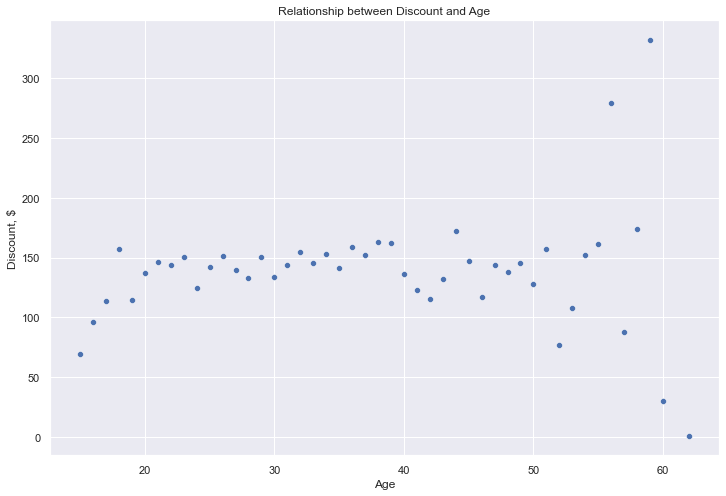

In [11]:
# Identify a running variable in which the discount treatment is discontinuous. No discontinuity observed.
plt.figure(figsize=(12,8))
sns.scatterplot(x="age", y="discount", data=age_grouped)
plt.ylabel('Discount, $')
plt.xlabel('Age')
plt.title('Relationship between Discount and Age')
plt.show()

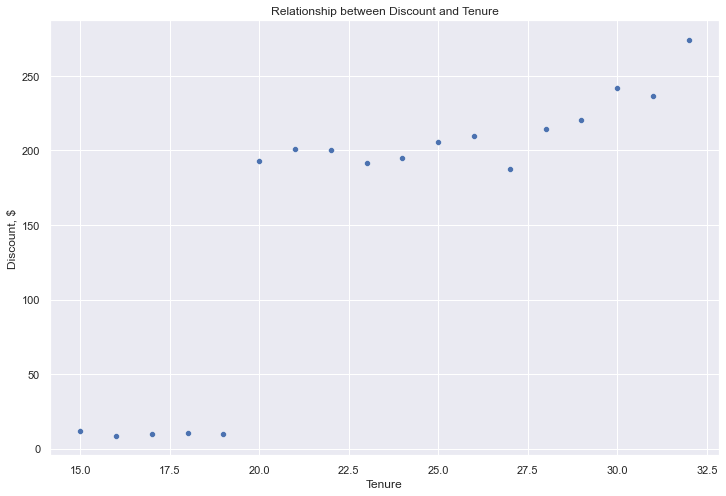

In [12]:
# Identify a running variable in which the discount treatment is discontinuous. No discontinuity observed.
plt.figure(figsize=(12,8))
sns.scatterplot(x="tenure", y="discount", data=tenure_grouped)
plt.ylabel('Discount, $')
plt.xlabel('Tenure')
plt.title('Relationship between Discount and Tenure')
plt.show()

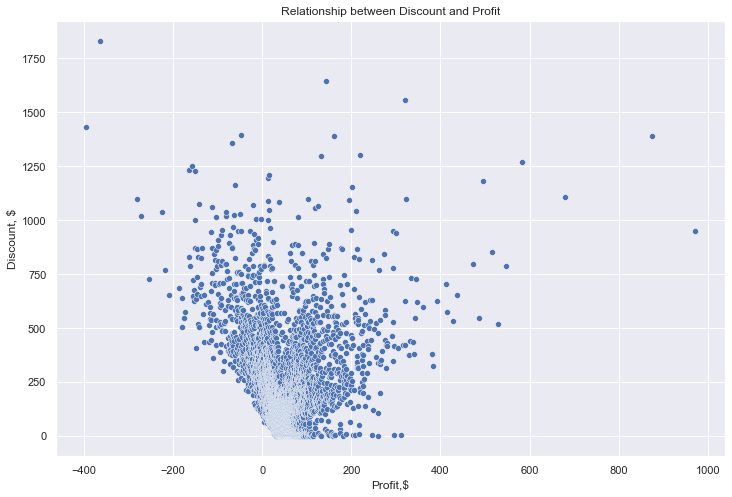

In [13]:
# Identify a running variable in which the discount treatment is discontinuous. No discontinuity observed.
plt.figure(figsize=(12,8))
sns.scatterplot(x="profit", y="discount", data=profit_grouped)
plt.ylabel('Discount, $')
plt.xlabel('Profit,$')
plt.title('Relationship between Discount and Profit')
plt.show()

In [14]:
tenure_sales_agg = df4.groupby('tenure').agg({'sales':'mean'})
tenure_profit_agg = df4.groupby('tenure').agg({'profit':'mean'})


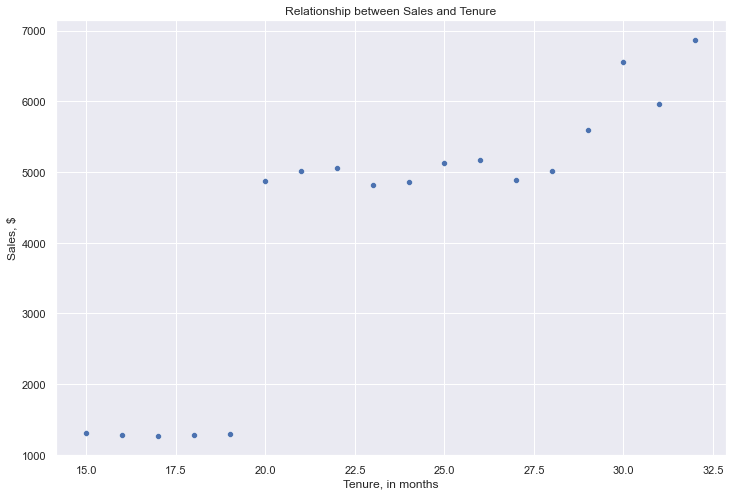

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='tenure', y='sales', data=tenure_sales_agg)
plt.ylabel('Sales, $')
plt.xlabel('Tenure, in months')
plt.title('Relationship between Sales and Tenure')
plt.show() 

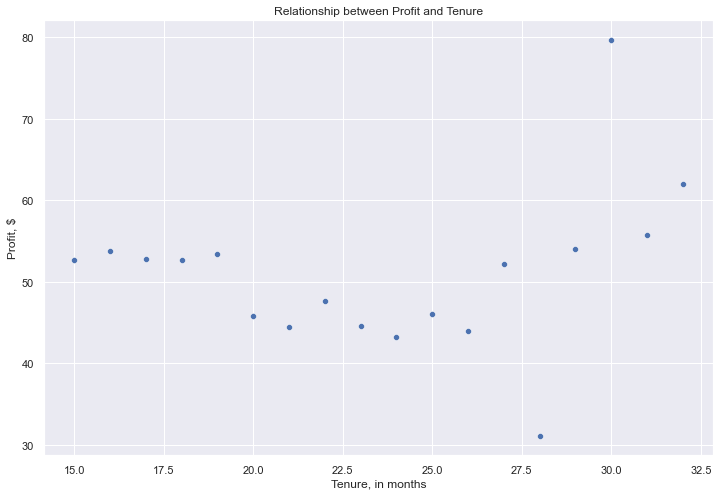

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='tenure', y='profit', data=tenure_profit_agg)
plt.ylabel('Profit, $')
plt.xlabel('Tenure, in months')
plt.title('Relationship between Profit and Tenure')
plt.show() 

In [17]:
# Grouping by tenure in order to get number of customers
number_customers = df4.groupby('tenure')['tenure'].sum()
df3['number_customers'] = pd.Series([15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32])

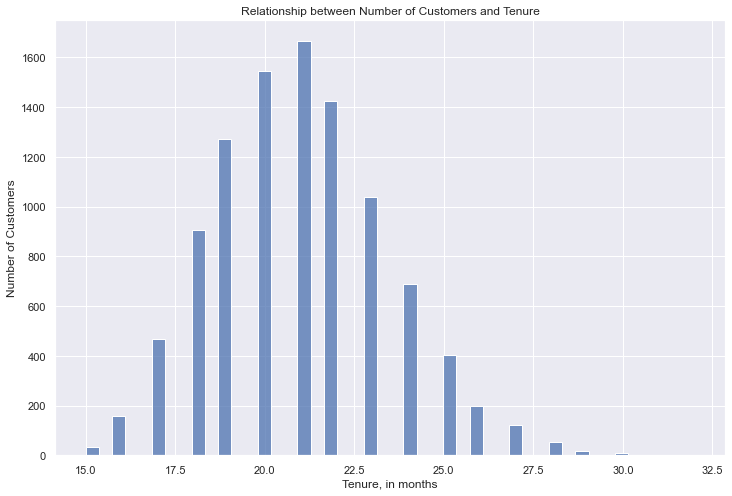

In [18]:
# With the aggregated data, plot the tenure on the x-axis and the number of customers on the y-axis. Esta a escala?
# I do not see any evidence of bunching
plt.figure(figsize=(12,8))
sns.histplot(data=df3, x="tenure")
plt.ylabel('Number of Customers')
plt.xlabel('Tenure, in months')
plt.title('Relationship between Number of Customers and Tenure')
plt.show() 

In [19]:
# Create a new dataframe rdd_centered with the feature engineering required for RDD
# rdd_centered: using df3 as rdd_centered until I figure out how to duplicate and modify dataframe
rdd_centered = df4.copy()
rdd_centered['centered_tenure'] = rdd_centered['tenure']-19


In [20]:
def threshold(tenure):
    return int(tenure > 19)

In [21]:
threshold(19)

0

In [22]:
rdd_centered['above_threshold'] = rdd_centered['tenure'].apply(threshold)

In [23]:
rdd_centered['below_threshold'] = rdd_centered['above_threshold'].apply(lambda x: int(not x))

In [24]:
rdd_centered.head(50)



,sales,discount,profit,age,gender,cust_state,tenure,centered_tenure,above_threshold,below_threshold
0,1442.30,4.0,66.93,30,0.0,MA,19,0,0,1
1,883.96,2.0,41.33,30,1.0,MG,20,1,1,0
2,4900.67,224.0,15.88,29,0.0,RJ,21,2,1,0
3,1547.48,1.0,74.99,36,1.0,BA,18,-1,0,1
4,1335.23,13.0,52.41,37,0.0,PB,19,0,0,1
5,1161.27,4.0,53.30,36,1.0,PA,19,0,0,1
6,3089.50,102.0,49.82,33,0.0,PR,24,5,1,0
7,3475.97,149.0,21.02,22,0.0,PA,24,5,1,0
8,1381.88,19.0,48.84,23,1.0,MG,19,0,0,1
9,9740.33,444.0,33.28,33,NaN,PA,22,3,1,0


In [25]:
# Check if it is statistically significant
mod = smf.ols(formula='discount ~ tenure + above_threshold + above_threshold:tenure', data=rdd_centered)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               discount   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     857.2
Date:                Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:14:05   Log-Likelihood:                -65365.
No. Observations:               10000   AIC:                         1.307e+05
Df Residuals:                    9996   BIC:                         1.308e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7

In [26]:
tenure_grouped_discount = rdd_centered.groupby('tenure').agg({'discount':'mean',
                                                     'above_threshold':'mean'})

In [27]:
tenure_grouped_discount.reset_index(inplace = True)

In [28]:
tenure_grouped_discount

,tenure,discount,above_threshold
0,15,11.606061,0.0
1,16,8.721519,0.0
2,17,9.633262,0.0
3,18,10.313053,0.0
4,19,9.882168,0.0
5,20,193.134067,1.0
6,21,201.152553,1.0
7,22,200.239635,1.0
8,23,191.514947,1.0
9,24,194.991266,1.0


In [29]:
tenure_grouped_discount['prediction_column'] = res.predict(tenure_grouped_discount)

In [30]:
tenure_grouped_discount.head()

,tenure,discount,above_threshold,prediction_column
0,15,11.606061,0.0,9.582855
1,16,8.721519,0.0,9.694702
2,17,9.633262,0.0,9.806550
3,18,10.313053,0.0,9.918397
4,19,9.882168,0.0,10.030244


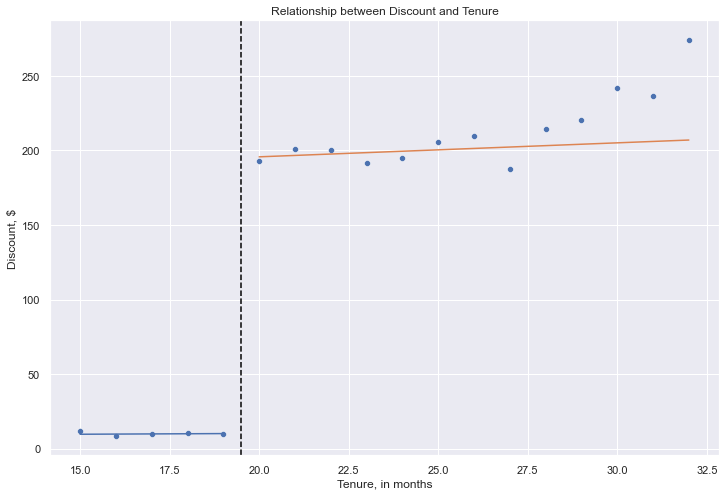

In [31]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='tenure', y='discount', data=tenure_grouped_discount)
sns.lineplot(x='tenure',
             y='prediction_column',
             data=tenure_grouped_discount[tenure_grouped_discount['tenure']<=19])
sns.lineplot(x='tenure',
             y='prediction_column',
             data=tenure_grouped_discount[tenure_grouped_discount['tenure']>19])
plt.axvline(19.5, linestyle='--', color='black')
plt.ylabel('Discount, $')
plt.xlabel('Tenure, in months')
plt.title('Relationship between Discount and Tenure')
plt.show() 

In [32]:
# Check if it is statistically significant
mod = smf.ols(formula='profit ~ tenure + above_threshold + above_threshold:tenure', data=rdd_centered)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     17.04
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           4.90e-11
Time:                        14:14:06   Log-Likelihood:                -52868.
No. Observations:               10000   AIC:                         1.057e+05
Df Residuals:                    9996   BIC:                         1.058e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 50

In [33]:
tenure_grouped_profit = rdd_centered.groupby('tenure').agg({'profit':'mean',
                                                     'above_threshold':'mean'})

In [34]:
tenure_grouped_profit.reset_index(inplace = True)

In [35]:
tenure_grouped_profit

,tenure,profit,above_threshold
0,15,52.723939,0.0
1,16,53.821772,0.0
2,17,52.782111,0.0
3,18,52.680398,0.0
4,19,53.393001,0.0
5,20,45.844495,1.0
6,21,44.487213,1.0
7,22,47.701012,1.0
8,23,44.601138,1.0
9,24,43.279330,1.0


In [36]:
tenure_grouped_profit['prediction_column'] = res.predict(tenure_grouped_profit)

In [37]:
tenure_grouped_profit.head()

,tenure,profit,above_threshold,prediction_column
0,15,52.723939,0.0,52.675241
1,16,53.821772,0.0,52.804595
2,17,52.782111,0.0,52.933949
3,18,52.680398,0.0,53.063303
4,19,53.393001,0.0,53.192657


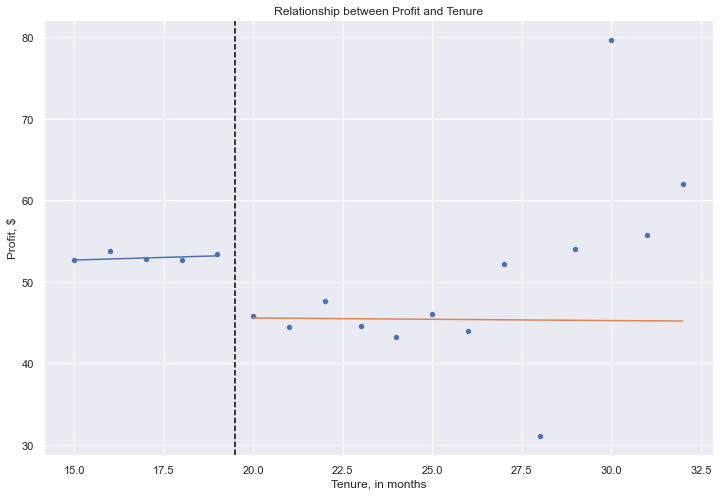

In [38]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='tenure', y='profit', data=tenure_grouped_profit)
sns.lineplot(x='tenure',
             y='prediction_column',
             data=tenure_grouped_profit[tenure_grouped_profit['tenure']<=19])
sns.lineplot(x='tenure',
             y='prediction_column',
             data=tenure_grouped_profit[tenure_grouped_profit['tenure']>19])
plt.axvline(19.5, linestyle='--', color='black')
plt.ylabel('Profit, $')
plt.xlabel('Tenure, in months')
plt.title('Relationship between Profit and Tenure')
plt.show() 